<a href="https://colab.research.google.com/github/marcelogbrito/machine-learning-negocios/blob/main/DeteccaoFraudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import special

import itertools
from datetime import timedelta
from IPython.display import display

In [2]:
fraudes = pd.read_csv('https://github.com/marcelogbrito/machine-learning-negocios/blob/main/Fraud_Data.csv?raw=true', header=0)

In [3]:
ips = pd.read_csv("https://github.com/marcelogbrito/machine-learning-negocios/blob/main/IpAddress_to_Country.csv?raw=true",header=0)

In [4]:
fraudes.dtypes

id                  int64
cadastro           object
compra             object
valor               int64
id_dispositivo     object
fonte              object
browser            object
genero             object
idade               int64
ip                float64
fraude              int64
dtype: object

In [5]:
for col in fraudes.columns:
    print("# de valores nulos em {}: {}".format(col, fraudes[col].isnull().sum()))

# de valores nulos em id: 0
# de valores nulos em cadastro: 0
# de valores nulos em compra: 0
# de valores nulos em valor: 0
# de valores nulos em id_dispositivo: 0
# de valores nulos em fonte: 0
# de valores nulos em browser: 0
# de valores nulos em genero: 0
# de valores nulos em idade: 0
# de valores nulos em ip: 0
# de valores nulos em fraude: 0


In [6]:
fraudes.describe()

,id,valor,idade,ip,fraude
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [7]:
for col in ips.columns:
    print("{}: {}".format(col, ips[col].dtype))

limite_inferior_ip: float64
limite_superior_ip: int64
pais: object


In [8]:
# checar se os numeros de ip sao inteiros ou nao com lambdas
ip_floats = ips.limite_inferior_ip.apply(lambda x: not x.is_integer()).sum()
print("Número de limites inferiores de endereço IP com decimal não-zero: {}".format(ip_floats))

Número de limites inferiores de endereço IP com decimal não-zero: 0


In [9]:
ips.limite_inferior_ip = ips.limite_inferior_ip.astype(int)

In [10]:
for col in ips.columns:
    print("# de valores nulos em {}: {}".format(col, ips[col].isnull().sum()))

# de valores nulos em limite_inferior_ip: 0
# de valores nulos em limite_superior_ip: 0
# de valores nulos em pais: 0


In [11]:
#checar se há outliers
display(ips[ips.limite_inferior_ip == ips.limite_inferior_ip.max()])
display(ips[ips.limite_superior_ip == ips.limite_superior_ip.max()])

,limite_inferior_ip,limite_superior_ip,pais
138845,3758096128,3758096383,Australia


,limite_inferior_ip,limite_superior_ip,pais
138845,3758096128,3758096383,Australia


In [12]:
ips.describe()

,limite_inferior_ip,limite_superior_ip
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [13]:
fraudes.describe()

,id,valor,idade,ip,fraude
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [14]:
def isp_counts(isp):
    pais = ips[(ips.limite_inferior_ip <= isp) & (ips.limite_superior_ip >= isp)]
    if pais.shape[0] == 1:
        return print("Único")
    elif pais.shape[0] > 1:
        return print("Vários países")
    elif pais.shape[0] == 0:
        if isp > ips.limite_superior_ip.max():
            return print("Muito grande")
        elif isp < ips.limite_inferior_ip.min():
            return print("Muito pequeno")
        else:
            return print("Faltando")
        
ip_counts = fraudes.ip.apply(isp_counts)
ip_counts.value_counts()

A saída de streaming foi truncada nas últimas 5000 linhas.
Único
Faltando
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Muito pequeno
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Muito pequeno
Único
Único
Único
Muito grande
Único
Muito grande
Único
Único
Único
Único
Único
Único
Único
Único
Único
Único
Muito grande
Único
Ún

Series([], Name: ip, dtype: int64)

In [15]:
def ip_para_pais(ip):
    tmp = ips[(ips.limite_inferior_ip <= ip) & (ips.limite_superior_ip >= ip)].pais
    if tmp.shape[0] == 1:
        return tmp.iloc[0]
    elif tmp.shape[0] < 1:
        return print("Faltando")
    elif tmp.shape[0] > 1:
        return print("Erro")

fraudes["pais"] = fraudes.ip.apply(ip_para_pais)

A saída de streaming foi truncada nas últimas 5000 linhas.
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Faltando
Falta

In [16]:
fraudes.head()

,id,cadastro,compra,valor,id_dispositivo,fonte,browser,genero,idade,ip,fraude,pais
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


## Analise exploratoria

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Genero x fraude

Text(0, 0.5, 'Casos')

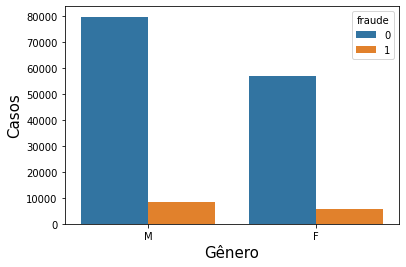

In [19]:
sns.countplot(x="genero", hue="fraude", data=fraudes)
plt.xlabel("Gênero", fontsize=15)
plt.ylabel("Casos", fontsize=15)

usando histograma countplot do seaborn usado apara contagem de observações em cada categoria (dados categoricos) https://seaborn.pydata.org/generated/seaborn.countplot.html

Hue indica de acordo com a variavel o que é fraude e o que não é

homens compõe a maioria da base de clientes do E-commerce. Portanto, estes estarão envolvidos em mais casos de fraude do que em relação às mulheres que compõe a minoria dos clientes.

### Fraude x valor

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.42499999999999716, 0.5, 'Valor de compra')

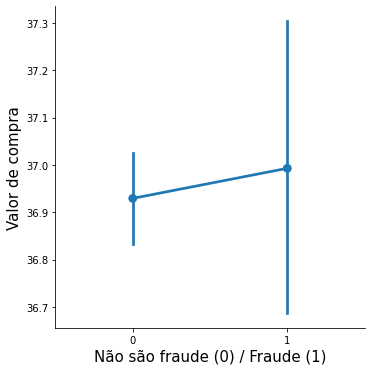

In [22]:
sns.factorplot(x="fraude", y="valor", data=fraudes)
plt.xlabel("Não são fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Valor de compra", fontsize=15)

gráfico factorplot do seaborn permite fazer uma analise estatistica em conjunto

Text(3.674999999999997, 0.5, 'Valor de compra')

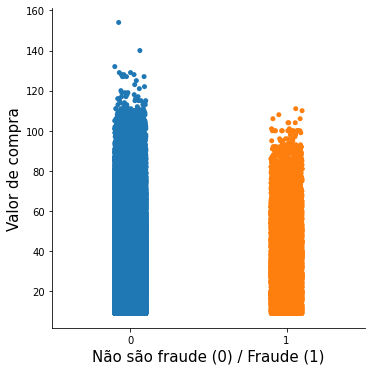

In [23]:
sns.catplot(x="fraude", y="valor", data=fraudes)
plt.xlabel("Não são fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Valor de compra", fontsize=15)

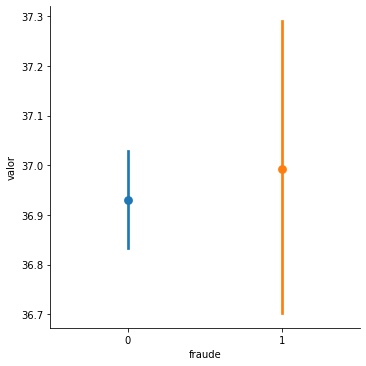

In [24]:
sns.catplot(x="fraude", y="valor", hue="fraude", kind="point", data=fraudes)

Observando a visualização, perceberemos que conseguimos produzir um gráfico que nos mostrará a média de valor de compra em cada um dos casos de fraude e não fraude. Embora haja um aumento muito pequeno no valor médio de compra associado à atividade fraudulenta apontados pelos pontos, as barras de erro são razoavelmente grandes para detectar uma tendência real. Aparentemente, ainda não temos informações consistentes.



### Fraude x idade

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-5.825000000000003, 0.5, 'Idade')

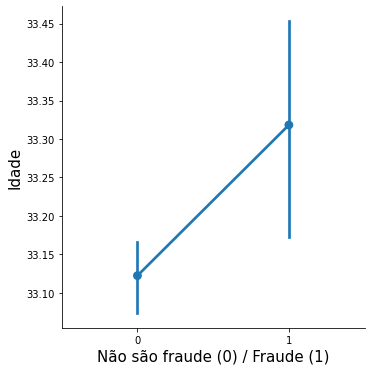

In [27]:
sns.factorplot(x="fraude", y="idade", data=fraudes)
plt.xlabel("Não são fraude (0) / Fraude (1)", fontsize=15)
plt.ylabel("Idade", fontsize=15)

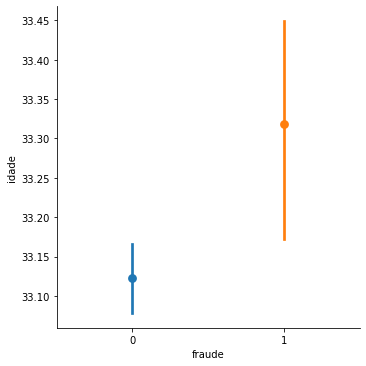

In [28]:
sns.catplot(x="fraude", y="idade", hue="fraude", kind="point", data=fraudes)

No gráfico fornecido, parece que pode haver uma tendência útil, mas novamente o aumento é bastante sutil; apesar de os casos de fraude terem uma média de idade um pouco maior dos que os casos de não fraude, a informação estará dentro das barras de erro inclusive. Portanto, não poderemos tirar nenhuma conclusão efetiva.

### Fraude x fonte de marketing

Text(0, 0.5, 'Contagem')

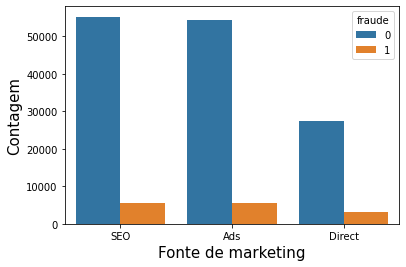

In [29]:
sns.countplot(x="fonte", hue="fraude", data=fraudes)
plt.xlabel("Fonte de marketing", fontsize=15)
plt.ylabel("Contagem", fontsize=15)

Perceberemos que, de forma geral, não parece existir uma fonte específica mais associada às fraudes. Porém, há menos fontes diretas associadas a fraude, pois são a minoria no geral.

Portanto, a diminuição provavelmente tem a ver com a campanha não ser tão bem sucedida quanto a otimização dos mecanismos de pesquisa e anúncio para atrair clientes ao site, o que fornece o dado à equipe de marketing da empresa de que realmente os usuários tendem a chegar na companhia mais por conta dos algoritmos do que anúncios, o que pode gerar mais campanhas fora da internet para aumentar a parte de "Direct".

## Explorando os países

In [30]:
sums_f = fraudes[fraudes["fraude"] == 1]["fraude"].groupby(fraudes.pais).sum()
sums_f = sums_f.to_frame().reset_index()

sums_nf = fraudes[fraudes["fraude"] == 0]["fraude"].groupby(fraudes.pais).sum()
sums_nf = sums_nf.to_frame().reset_index()

In [ ]:
f, ax = plt.subplots(figsize=(20,25))
sns.set_color_codes("muted")
sns.barplot(x="fraude", y="pais", data=sums_f,
            label="Total", color="b")
plt.xlabel("Contagem",fontsize=15)
plt.ylabel("Países",fontsize=15)

## Explorando os IDs e IPs

In [ ]:
tmp_df = pd.DataFrame(columns=("fraude","id_por_dispositivo","id_por_ip"))
tmp_df["fraude"] = fraudes["fraude"]

userid_count = fraudes.groupby["id_dispositivo"].id.count()
tmp_df[id_por_dispositivo"] = fraude_df.id_dispositivo.apply(lambda x: userid_count[x])

userid_count2 = fraudes.groupby["ip"].id.count()
tmp_df["id_por_ip"] = fraudes.ip.apply(lambda x: userid_count2[x])